<a href="https://colab.research.google.com/github/mukeshsablani3126/ML_Regression-project_yes-bank_stock-closing-prediction/blob/main/ML_Yes_Bank_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank Stock Predication**
Problem Statement - Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

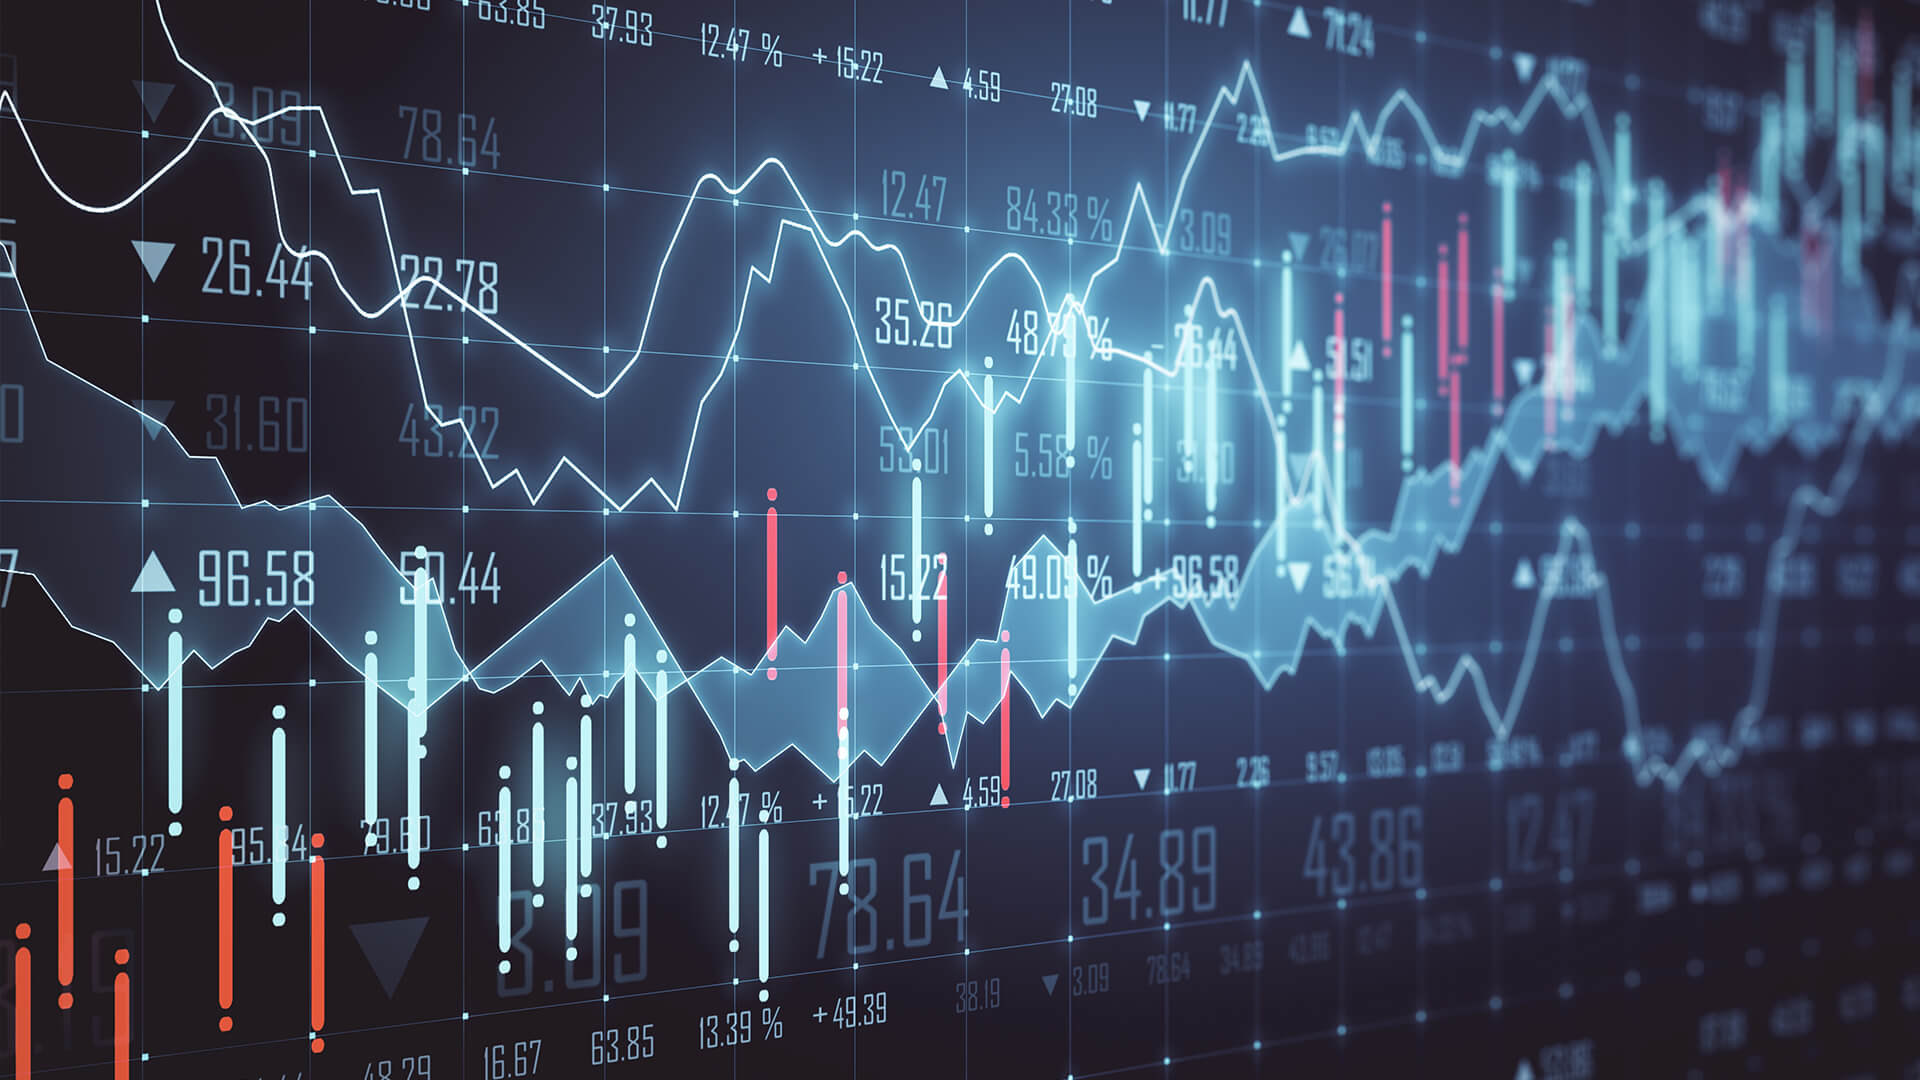

# **1. Importing Libraries and dataset**




In [1]:

#Importing libraries for data handelling
import pandas as pd
import numpy as np
from numpy import math

#Importing libraries for Data Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import neighbors
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
from datetime import datetime
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

In [3]:
from google.colab import drive #importing the drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Yes Bank Stock Prediction ML Capstone  Project-Mukesh Kumar Sablani/YesBank_StockPrices .csv')  #reading the csv file

In [5]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


# **2. Data Study**

In [6]:
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [7]:
df.shape

(185, 5)

####Here we can see that we have 185 rows and 5 columns in our dataset

In [8]:
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


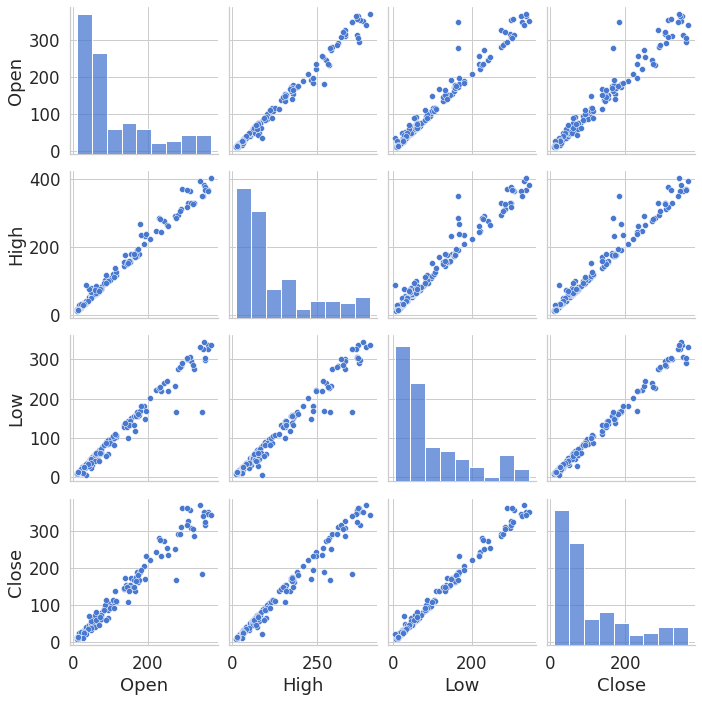

In [10]:
# to see the distribution of values
sns.pairplot(data = df[['Open','High','Low','Close']])

# **3. Data Manipulation**

## 3.1 Finding Null Values

In [11]:
#To get the percentage of null values each column wise
nullvalues_percentage = df.isna().sum().sort_values(ascending= False)/len(df) 
nullvalues_percentage

Date     0.0
Open     0.0
High     0.0
Low      0.0
Close    0.0
dtype: float64

####Here we can find that there are no null values in our dataset.

# **4. EDA AND DATA VISUALIZATION**

## 4.1 Year-Wise Study Open and Close

In [12]:
new_df = df.copy()

In [13]:
new_df['Date'] = new_df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))
new_df.set_index('Date',inplace=True)

[]

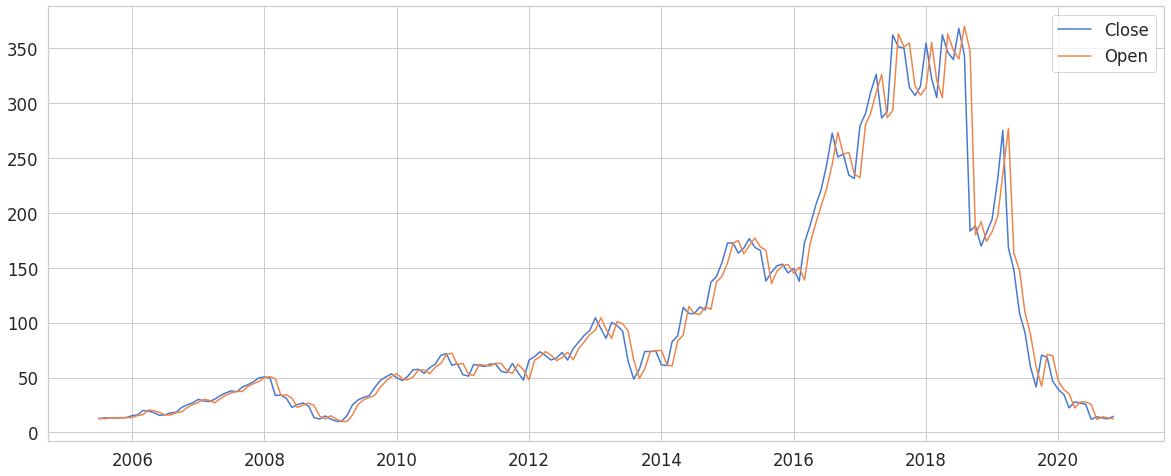

In [14]:
plt.figure(figsize=(20,8))
plt.plot(new_df['Close'])
plt.plot(new_df['Open'])
plt.legend(['Close','Open'])
plt.plot()

####We can see that there is a medium increase in stock prices of YES Bank from year 2006 to 2016.
####After 2016 stock prices started increasing at a fast pace but in 2018 it drop down sharply due to Rana Kapoor Case.

## 4.2 Year-Wise Study High and Low

[]

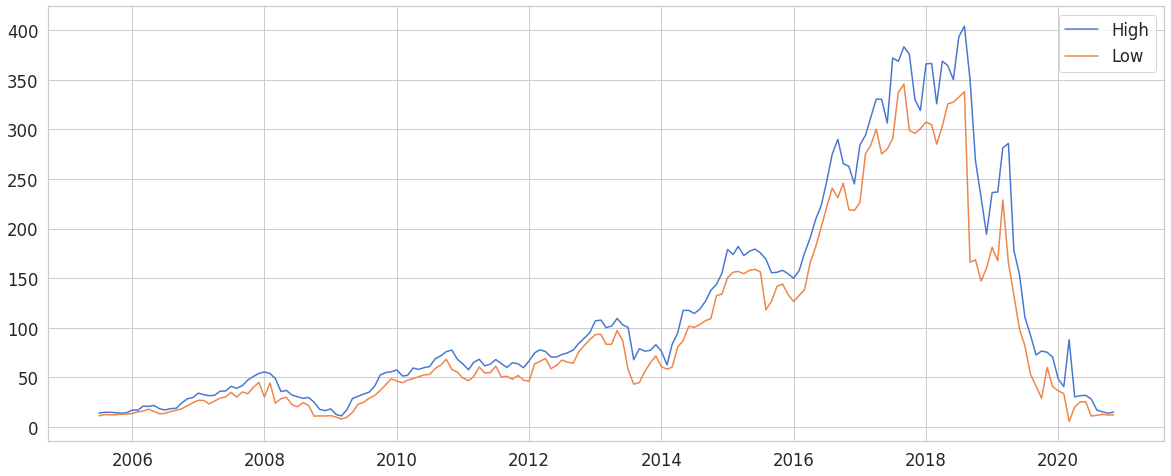

In [15]:
plt.figure(figsize=(20,8))
plt.plot(new_df['High'])
plt.plot(new_df['Low'])
plt.legend(['High','Low'])
plt.plot()

#### High and Low stock prices shows the similar trend as the above graph.

## 4.3 Data Distribution of mean and median in each variables

In [16]:
num_cols = df[['Open','High','Low']]

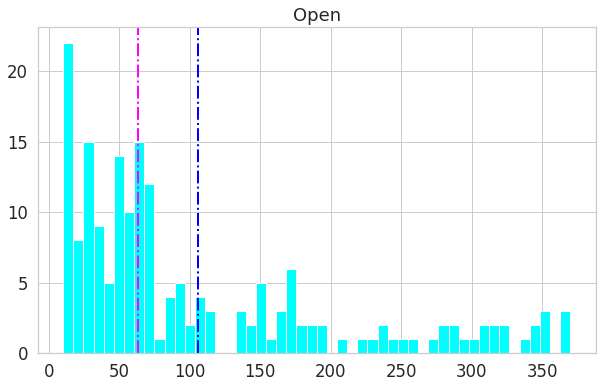

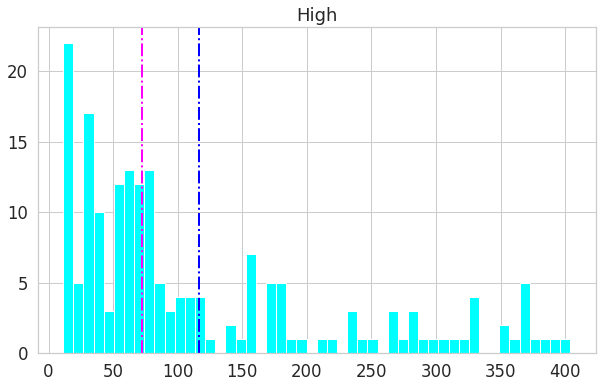

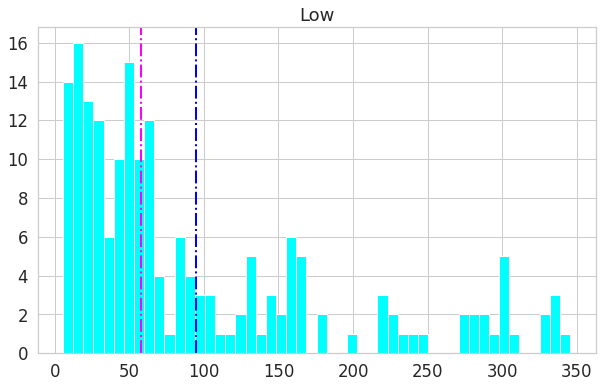

In [ ]:
for i in num_cols[:]:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  features = df[i]
  label = df['Close']
  features.hist(bins = 50,ax = ax,color = 'cyan')
  ax.axvline(features.mean(),color = 'blue',linestyle = 'dashdot',linewidth = 2)
  ax.axvline(features.median(),color = 'magenta',linestyle = 'dashdot',linewidth = 2)
  ax.set_title(i)

#### From the above graph we can see that there is huge difference between mean and median.

## 4.4 Dependent and Independent feature study

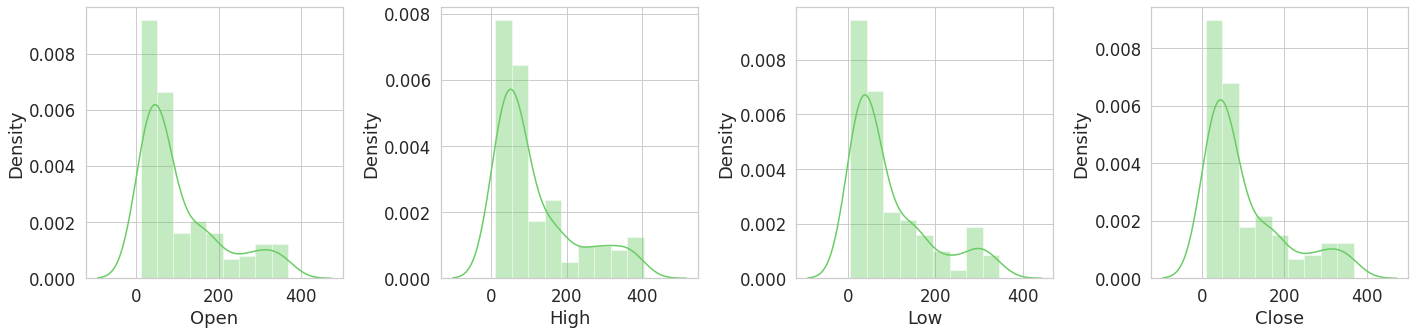

In [17]:
fig, axs = plt.subplots(ncols=4,figsize=(20,5))

#graph plot
sns.distplot(df['Open'], color='g', ax=axs[0])
sns.distplot(df['High'], color='g', ax=axs[1])
sns.distplot(df['Low'], color='g',ax=axs[2])
sns.distplot(df['Close'], color='g', ax=axs[3])

# this prevents plots from overlapping
plt.tight_layout()

####From this graph We can see that variables in our dataset are negatively skewed so we have to perform log transformation to make it a normal distribution.

## 4.5 Data Transformation

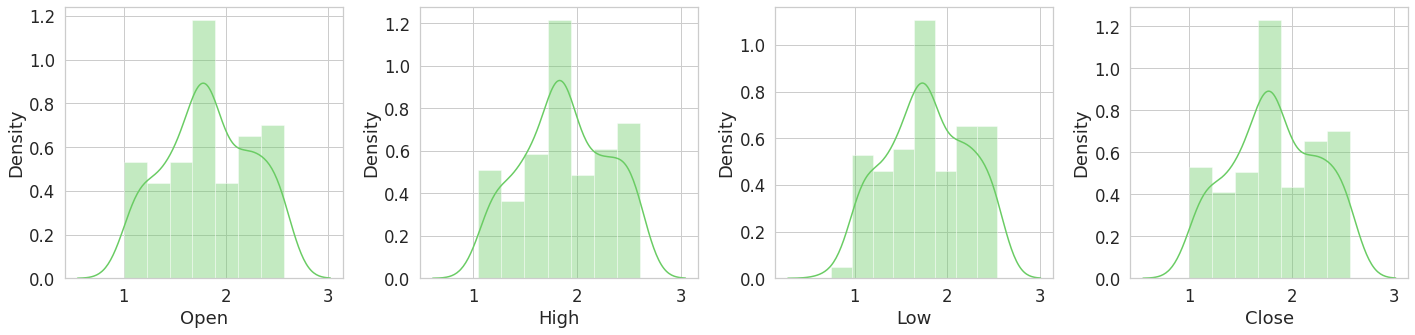

In [18]:
# subplots and figure size
fig, axs = plt.subplots(ncols=4,figsize=(20,5))

#graph plot
sns.distplot(np.log10(df['Open']), color='g', ax=axs[0])
sns.distplot(np.log10(df['High']), color='g', ax=axs[1])
sns.distplot(np.log10(df['Low']), color='g',ax=axs[2])
sns.distplot(np.log10(df['Close']), color='g', ax=axs[3])

plt.tight_layout()

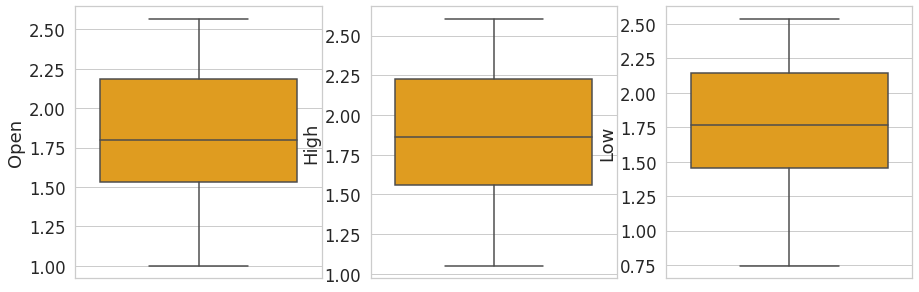

In [19]:
fig, axes = plt.subplots(1,3,figsize=(15,5))
fig = sns.boxplot(y=np.log10(df["Open"]), color="orange",ax=axes[0])
fig = sns.boxplot(y=np.log10(df["High"]), color="orange",ax=axes[1])
fig = sns.boxplot(y=np.log10(df["Low"]), color="orange",ax=axes[2])

####After applying Log Transformation we can clearly see that the values of numeric columns in the dataset have a common scale, without distorting differences in the ranges of values.

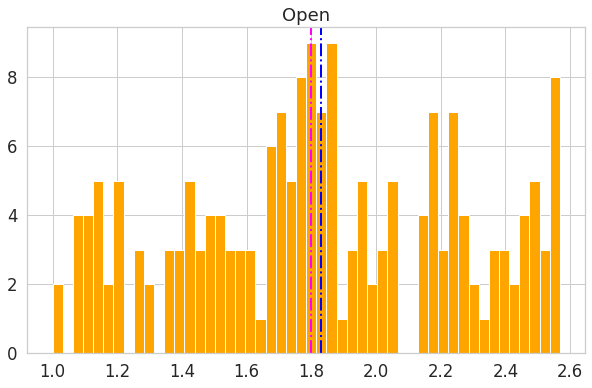

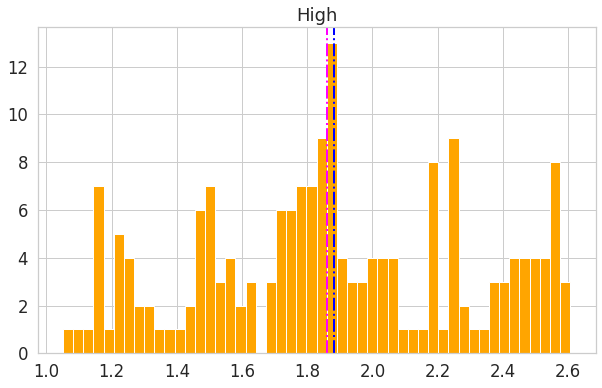

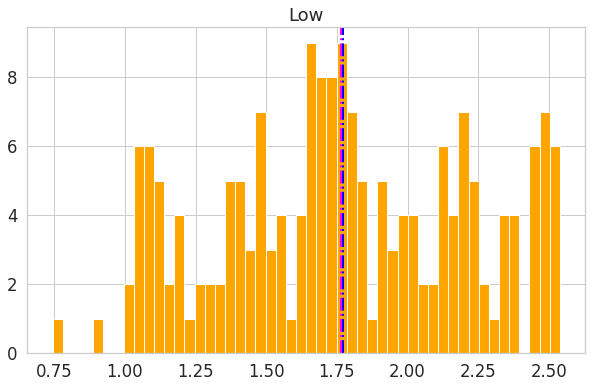

In [20]:
for i in num_cols[:]:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  features = np.log10(df[i])
  label = df['Close']
  features.hist(bins = 50,ax = ax,color = 'orange')
  ax.axvline(features.mean(),color = 'blue',linestyle = 'dashdot',linewidth = 2)
  ax.axvline(features.median(),color = 'magenta',linestyle = 'dashdot',linewidth = 2)
  ax.set_title(i)

####After applying log transformation method, the mean-median difference is reduced.

## 4.6 Co-relation between Independent and Dependent variables

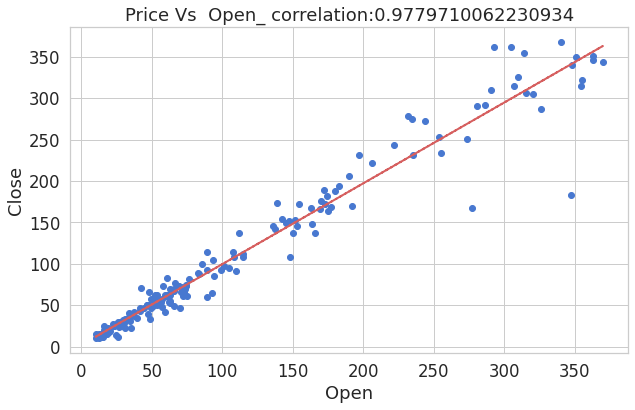

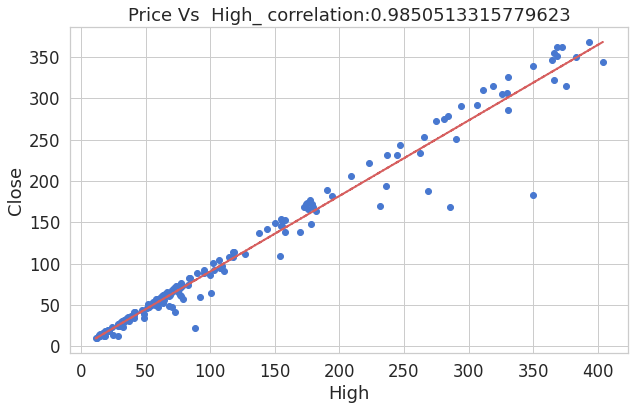

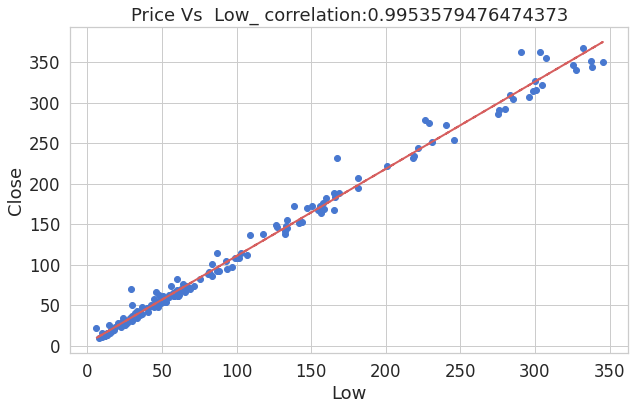

In [21]:
for col in num_cols[:-1]:
  fig = plt.figure(figsize = (10,6))
  ax = fig.gca()
  features = df[col]
  label = df['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(df[col],df['Close'],1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col] , y_hat, "r--",lw = 2)
plt.show()

####We can see that there is a high correlation between the independent and dependent features.

## 4.7 Heatmap

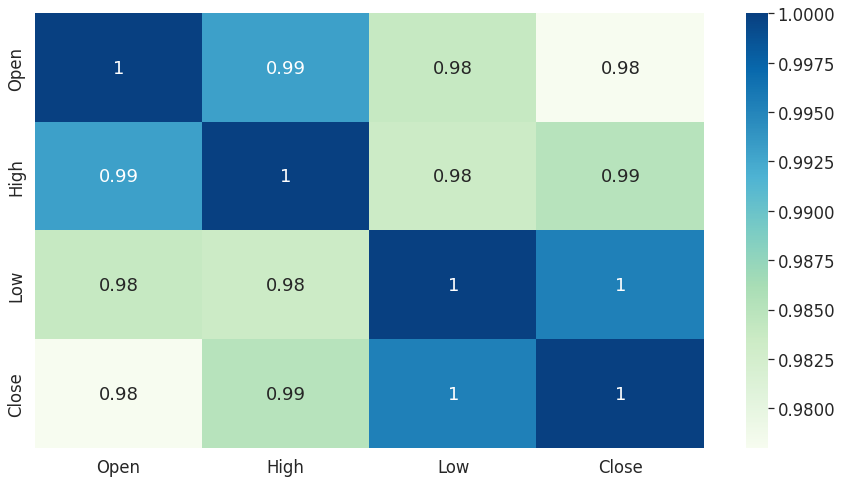

In [22]:
corr = df.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True,cmap = 'GnBu')

## 4.8 Checking for Multicollinearity

In [23]:
# Creating a VIF function
def cal_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

In [24]:
# Checking the collinearity of each dependent features
cal_vif(df[[i for i in df.describe().columns if i not in ['Close','Date']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


####Since there is high VIF value for independent variables showing that there is high multicollinearity but we can't remove any variable as the number of columns are very less.

# **5. Data Modelling**

####**Normalisation**

In [25]:
# Defining X to the normalized features except Date and Close
X = df.drop(columns=['Close','Date']).apply(zscore)

# Defining y to the normalized feature Close
y = np.log10(df['Close'])

####We have dropped 'Date' column from independent variables and applied Z score for normalisation for standardizing values on the same scale by dividing a score’s deviation by the standard deviation in a data set

####**Train_test Split**

In [26]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

####We have divided our dataset into train and test model with the ratio of 80:20.

In [27]:
# Checking  the shapes of Training and Testing Datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 3)
(37, 3)
(148,)
(37,)


In [28]:
X_train[0:10]

,Open,High,Low
59,-0.495287,-0.530001,-0.465501
73,-0.432415,-0.491716,-0.488475
120,0.643516,0.560849,0.676052
145,2.610818,2.380253,2.664784
118,0.653657,0.573863,0.690892
17,-0.812692,-0.815161,-0.775485
5,-0.933468,-0.958684,-0.900797
130,0.854444,0.875996,0.948991
122,0.304917,0.371497,0.352328
91,-0.011473,-0.078309,-0.017014


In [29]:
X_test[0:10]

,Open,High,Low
16,-0.839058,-0.826382,-0.808462
179,-0.788862,-0.793566,-0.762844
66,-0.431604,-0.495676,-0.500787
40,-0.920285,-0.926999,-0.920034
166,0.585714,0.584141,0.418831
155,2.458707,2.206555,2.554641
97,-0.400979,-0.455410,-0.568609
177,-0.844128,-0.807711,-0.820553
35,-0.753673,-0.791020,-0.795051
54,-0.526724,-0.551878,-0.533434


####**Feature Scaling**

In [30]:
#data transformation
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

####We did Min Max scaling to rescale the range of features in the range of [0, 1] 

In [31]:
X_train[0:10]

array([[0.12974024, 0.12389245, 0.13840271],
       [0.14696486, 0.13422955, 0.13225474],
       [0.44172802, 0.41842346, 0.44388881],
       [0.98069176, 0.90966494, 0.97608472],
       [0.44450618, 0.42193706, 0.44785998],
       [0.04278372, 0.04689887, 0.05544933],
       [0.00969579, 0.00814747, 0.02191499],
       [0.49951382, 0.5035136 , 0.51692896],
       [0.34896513, 0.3672981 , 0.35725842],
       [0.26228643, 0.24584988, 0.25842036]])

In [32]:
X_test[0:10]

array([[0.03556049, 0.04386903, 0.0466245 ],
       [0.0493124 , 0.0527294 , 0.05883218],
       [0.14718711, 0.1331602 , 0.12896014],
       [0.0133074 , 0.01670231, 0.01676717],
       [0.42589249, 0.42471229, 0.37505516],
       [0.93901931, 0.86276607, 0.9466098 ],
       [0.15557716, 0.14403198, 0.11081041],
       [0.03417141, 0.04891028, 0.04338873],
       [0.05895263, 0.05341684, 0.05021327],
       [0.12112793, 0.11798554, 0.12022356]])

##**5.1 Linear Regression**

In [33]:
reg = LinearRegression()
reg_model = reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.8146653424416905

In [34]:
reg.intercept_

1.450888534698787

In [35]:
reg.coef_

array([-0.16988184,  0.73317897,  0.86597216])

####**Prediction**

In [36]:
#predictions
y_pred = reg.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

####**Evaluation Metrics**

In [37]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_pred))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.03158251893048737
MAE : 0.15128511034606276
RMSE : 0.17771471219481907
R2 : 0.8225699915389755
Adjusted R2 :  0.8064399907697914


In [38]:
#empty data frame creation for evaluation metrics for each regression model into this data frame to compare at the end.
i=0
metric_df=pd.DataFrame()
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Linear regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"MAE"]= MAE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i+=1

####**Visualisation**

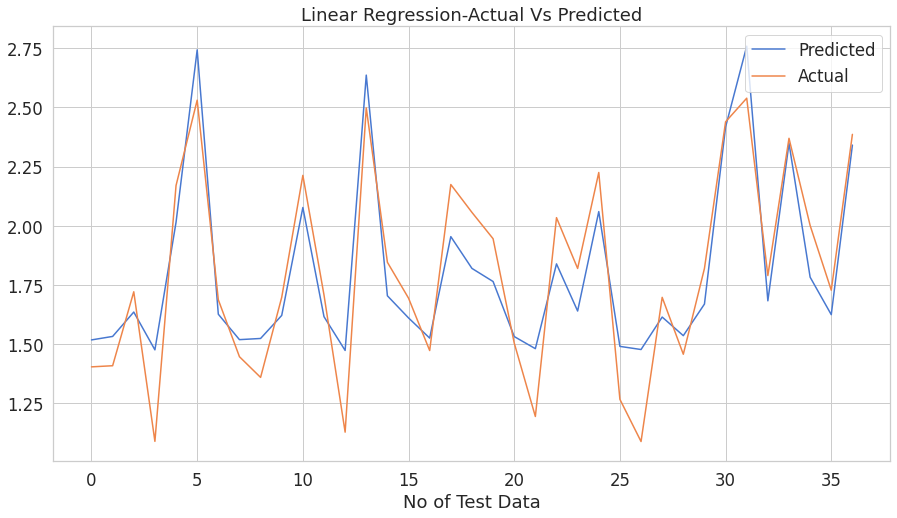

In [39]:
#actual-predicted values plot
plt.figure(figsize=(15,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.title('Linear Regression-Actual Vs Predicted')
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

##**5.2 Ridge Regression**

In [40]:
#fitting data
ridge  = Ridge(alpha=5)
ridge.fit(X_train,y_train)

Ridge(alpha=5)

In [41]:
ridge.score(X_train, y_train)

0.7971486688919869

In [42]:
ridge.score(X_test, y_test)

0.7978267508805001

####**Prediction**

In [43]:
# Predicting using the Testing Features
y_ridge_pred = ridge.predict(X_test)
y_ridge_pred

array([1.55644016, 1.57066987, 1.67201967, 1.52391106, 2.0057393 ,
       2.6294936 , 1.6721822 , 1.55659339, 1.57116243, 1.65176772,
       2.05192789, 1.64068969, 1.52024607, 2.51896565, 1.72125784,
       1.64249937, 1.56423439, 1.94799604, 1.80341512, 1.76626641,
       1.57319622, 1.53096229, 1.8384666 , 1.65441514, 2.02626695,
       1.5354457 , 1.52530008, 1.6383233 , 1.5756    , 1.69926743,
       2.31060053, 2.65877694, 1.71248182, 2.30176124, 1.77911846,
       1.64957603, 2.25183109])

####**Evaluation**

In [44]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_ridge_pred))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_ridge_pred))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_ridge_pred))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_ridge_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.03598681261945239
MAE : 0.1570704396299197
RMSE : 0.18970190462789874
R2 : 0.7978267508805001
Adjusted R2 :  0.7794473645969093


####**Cross Validation and Hyperparameter Tuning**

In [45]:
# Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [46]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the neg_mean_squared_error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the neg_mean_squared_error is:  -0.035287698578709864


In [47]:
#training the data with alpha=1
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [48]:
ridge.score(X_train, y_train)

0.8114557966496079

In [49]:
ridge.score(X_test, y_test)

0.8164107352000802

In [50]:
#Prediction
y_pred_ridge = ridge_regressor.predict(X_test)
y_pred_ridge

array([1.52363934, 1.53950359, 1.65147831, 1.48676803, 2.02341628,
       2.7257897 , 1.65011276, 1.52368738, 1.53901778, 1.62976844,
       2.07741879, 1.61843866, 1.48318818, 2.60390027, 1.70828562,
       1.61948309, 1.53219564, 1.96060489, 1.80076803, 1.75906672,
       1.54190217, 1.49450483, 1.83932752, 1.63349981, 2.05019403,
       1.50013616, 1.48828434, 1.61559809, 1.54485816, 1.68242956,
       2.36963964, 2.75593021, 1.69685984, 2.35505327, 1.77352279,
       1.62810209, 2.30469895])

####**Evaluation after Cross Validation**

In [51]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_pred_ridge))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,R2)
Adjusted_R2 = 1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.03267886577512844
MAE : 0.15335180694360634
RMSE : 0.18077296748996638
R2 : 0.8164107352000802
Adjusted R2 :  0.7997208020364512


In [ ]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Ridge regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"MAE"]= MAE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

####**Visualisation**

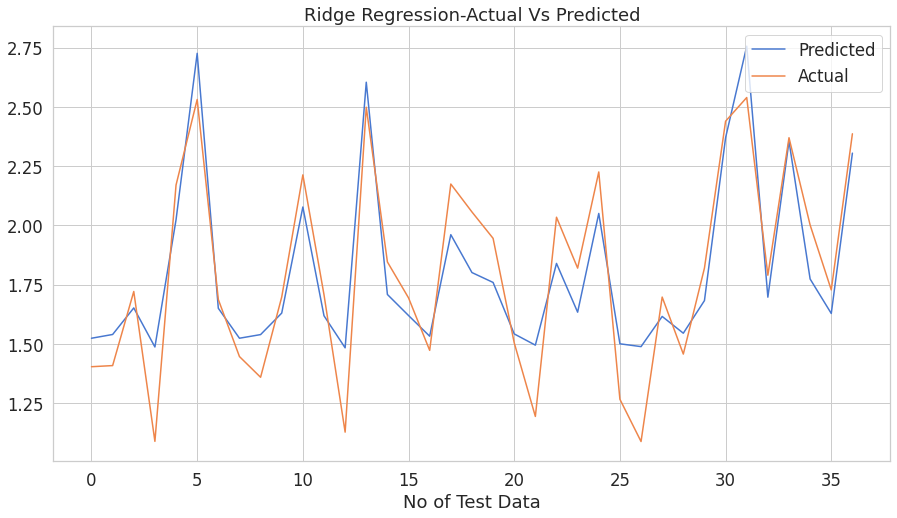

In [52]:
#actual-predicted values plot
plt.figure(figsize=(15,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.title('Ridge Regression-Actual Vs Predicted')
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

##**5.3 Lasso Regression**

In [53]:
#fitting data
lasso  = Lasso(alpha=0.01,max_iter=1000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [54]:
lasso.score(X_train, y_train)

0.8068491694286274

In [55]:
lasso.score(X_test,y_test)

0.8090975953406103

####**Prediction**

In [56]:
# Predicting using the Testing Features
y_lasso_pred = lasso.predict(X_test)
y_lasso_pred

array([1.54694602, 1.56066183, 1.65728043, 1.51008232, 2.00195242,
       2.65813204, 1.65140342, 1.54777141, 1.55516939, 1.64213204,
       2.0559078 , 1.63542222, 1.50734379, 2.55650027, 1.71634387,
       1.6325109 , 1.5541834 , 1.94537999, 1.8161572 , 1.76893099,
       1.5610699 , 1.5153393 , 1.83846895, 1.65521677, 2.03719097,
       1.52293206, 1.511376  , 1.63376672, 1.56418108, 1.68718914,
       2.35369383, 2.67678397, 1.69997363, 2.30558   , 1.78471567,
       1.64359171, 2.28623195])

####**Evaluation**

In [57]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_lasso_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R2 = r2_score((y_test), (y_lasso_pred))
print("R2 :" ,R2)

Adjusted_R2 =1-(1-r2_score((y_test), (y_lasso_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.033980603739615686
RMSE : 0.1843382861470066
R2 : 0.8090975953406103
Adjusted R2 :  0.7917428312806658


####**Cross Validation and Hyperparameter Tuning**

In [58]:
# Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=2)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [59]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -0.0355353986925849


In [60]:
#fitting data with best parameters
lasso  = Lasso(alpha=0.0014,max_iter=1000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0014)

In [61]:
lasso.score(X_train, y_train)

0.8143542093236373

In [62]:
lasso.score(X_test,y_test)

0.8200013505995645

In [63]:
# Predicting using the Testing Features
y_lasso_pred = lasso.predict(X_test)
y_lasso_pred

array([1.52070545, 1.53589827, 1.64084746, 1.480258  , 2.01470481,
       2.73991575, 1.63264895, 1.52110076, 1.52932677, 1.62468815,
       2.07732523, 1.61837474, 1.47816989, 2.6288971 , 1.70698223,
       1.61437356, 1.52849541, 1.95608409, 1.81280307, 1.76360921,
       1.53602598, 1.48629617, 1.84009714, 1.6375405 , 2.0578975 ,
       1.49513054, 1.48162893, 1.61584921, 1.5398677 , 1.67413478,
       2.40021898, 2.75777191, 1.68755844, 2.34879176, 1.78026857,
       1.6269734 , 2.33047619])

####**Evaluation after Cross Validation**

In [64]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_lasso_pred))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_lasso_pred))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_lasso_pred))
print("R2 :" ,R2)
Adjusted_R2 =1-(1-r2_score((y_test), (y_lasso_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.032039736690877604
MAE : 0.15231672779126443
RMSE : 0.17899647116878478
R2 : 0.8200013505995645
Adjusted R2 :  0.8036378370177067


In [65]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Lasso regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"MAE"]= MAE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

####**Visualisation**

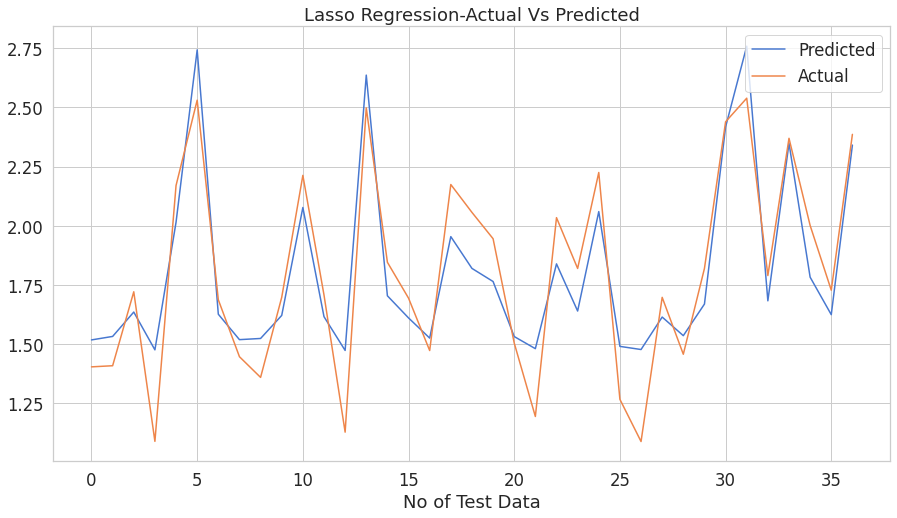

In [66]:
#actual-predicted values plot
plt.figure(figsize=(15,8))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.title('Lasso Regression-Actual Vs Predicted')
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

## **5.4 Elastic Net Regression**

In [67]:
#Applying Elastic net to the training dataset

elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [68]:
elastic.score(X_train, y_train)

0.5418204159491762

In [69]:
elastic.score(X_test, y_test)

0.5309002349934002

####**Prediction**

In [70]:
# Predicting using the Testing Features
y_elastic_pred = elastic.predict(X_test)
y_elastic_pred

array([1.69933765, 1.7062825 , 1.75608348, 1.68353768, 1.91958656,
       2.22292125, 1.75656251, 1.69947378, 1.70674092, 1.74600026,
       1.94147187, 1.74032946, 1.68158796, 2.16862517, 1.77972588,
       1.74144215, 1.70318233, 1.89082076, 1.82003286, 1.80171222,
       1.70761334, 1.6869842 , 1.83703175, 1.74728261, 1.92860623,
       1.68902933, 1.684226  , 1.73926306, 1.70870793, 1.76926962,
       2.0675843 , 2.23786602, 1.77582837, 2.06395188, 1.8080259 ,
       1.74474363, 2.0384172 ])

####**Evaluation**

In [71]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_elastic_pred))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_elastic_pred))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_elastic_pred))
print("R2 :" ,R2)
Adjusted_R2 =1-(1-r2_score((y_test), (y_elastic_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.08349969848455795
MAE : 0.23985820014024148
RMSE : 0.2889631438169199
R2 : 0.5309002349934002
Adjusted R2 :  0.48825480181098213


####**Cross Validation and Hyperparameter Tuning**

In [72]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=3)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [73]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}

Using  {'alpha': 0.001, 'l1_ratio': 0.8}  the negative mean squared error is:  -0.035263119200658534


In [74]:
#Applying Elastic net to the training dataset with alpha = 0.001 and l1 ratio = 0.8
elastic = ElasticNet(alpha=0.001,l1_ratio=0.8)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.001, l1_ratio=0.8)

In [75]:
elastic.score(X_train, y_train)

0.8144296303988935

In [76]:
elastic.score(X_test, y_test)

0.8204679206585326

In [78]:
# Predicting using the Testing Features
y_pred_elastic = elastic.predict(X_test)
y_pred_elastic

array([1.51924207, 1.53446444, 1.63997794, 1.47864891, 2.01593988,
       2.7428447 , 1.63205673, 1.51972827, 1.52796483, 1.62367948,
       2.07818636, 1.61715946, 1.47639257, 2.63133961, 1.7061179 ,
       1.61328532, 1.52708657, 1.95650288, 1.81296792, 1.7631369 ,
       1.53464872, 1.48466147, 1.8398671 , 1.63684187, 2.05849427,
       1.49343941, 1.48003328, 1.61474915, 1.53842923, 1.67330261,
       2.40291687, 2.76122259, 1.68688046, 2.35106524, 1.77997195,
       1.6258531 , 2.33217292])

In [79]:
#evaluation metrics
MSE  = mean_squared_error((y_test), (y_pred_elastic))
print("MSE :" , MSE)
MAE = mean_absolute_error((y_test), (y_pred_elastic))
print("MAE :", MAE)
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
R2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,R2)
Adjusted_R2 =1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Adjusted R2 : ",Adjusted_R2)

MSE : 0.03195668727974603
MAE : 0.15209455795880464
RMSE : 0.17876433447347945
R2 : 0.8204679206585326
Adjusted R2 :  0.804146822536581


In [80]:
#Inserting evalution value in dataframe
metric_df.loc[i,"Model_Name"]='Elastic Net regression'
metric_df.loc[i,"MSE"]= MSE
metric_df.loc[i,"MAE"]= MAE
metric_df.loc[i,"RMSE"]= RMSE
metric_df.loc[i,"R2"]= R2
metric_df.loc[i,"Adjusted R2"]= Adjusted_R2

i=i+1

####**Visualisation**

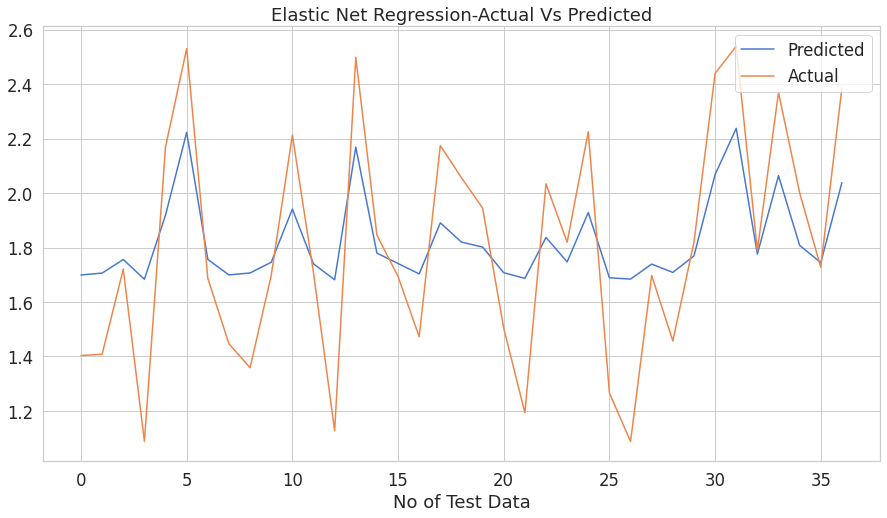

In [81]:
#actual-predicted values plot
plt.figure(figsize=(15,8))
plt.plot(y_elastic_pred)
plt.plot(np.array(y_test))
plt.title('Elastic Net Regression-Actual Vs Predicted')
plt.legend(["Predicted","Actual"],loc = 'upper right')
plt.xlabel('No of Test Data')
plt.show()

##**METRICS COMPARISION**

In [82]:
#sorting metrics
metric_df.sort_values(by=['R2'],ascending=False,inplace=True)

In [83]:
metric_df

,Model_Name,MSE,MAE,RMSE,R2,Adjusted R2
0,Linear regression,0.031583,0.151285,0.177715,0.822570,0.806440
2,Elastic Net regression,0.031957,0.152095,0.178764,0.820468,0.804147
1,Lasso regression,0.032040,0.152317,0.178996,0.820001,0.803638


###**From the above graph we can see that Linear regression is having the best R2 and Adjusted R2 score hence Linear Regression is the best model.**